# TODOGAS CHALLENGE - Cleaning and exploratory analysis

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_completo = pd.read_csv('/content/drive/Shareddrives/Datathon 2022/all_years_filtered_2022.csv')
df=df_completo

In [4]:
# Dimensions
df_completo.shape

(12866316, 14)

In [5]:
# Number of municipalities
len(df['Filial'].unique())

23

In [6]:
# Drop columns
df=df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Empresa', '%Key_Folio','%Key_Cliente','%Key_Ticket'])
df.head()

,Region,Filial,Tipo,Punto de venta,%Key_FechaID,Litros,$,Tem_prom
0,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 09,2019-09-15,16.0,131.0,24.9
1,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 08,2019-09-01,15.0,120.0,24.9
2,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 08,2019-09-02,12.0,92.0,24.9
3,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 08,2019-09-05,13.0,105.0,24.9
4,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 08,2019-09-06,13.0,105.0,24.9


In [7]:
# Rename gas types
df.loc[df['Tipo']=='Estacion de Carburacion', 'Tipo'] = 'EC'
df.loc[df['Tipo']=='AtqGas', 'Tipo'] = 'Autotanque'

In [8]:
df.isna().sum()

Region            0
Filial            0
Tipo              0
Punto de venta    0
%Key_FechaID      0
Litros            0
$                 0
Tem_prom          0
dtype: int64

In [9]:
# Remove rows where liters = 0
df = df.loc[df['Litros']!=0]

In [10]:
# Remove rows where $ = 0
df = df.loc[df['$']!=0]

In [11]:
# Dimensions (with rows removed)
df.shape

(12603900, 8)

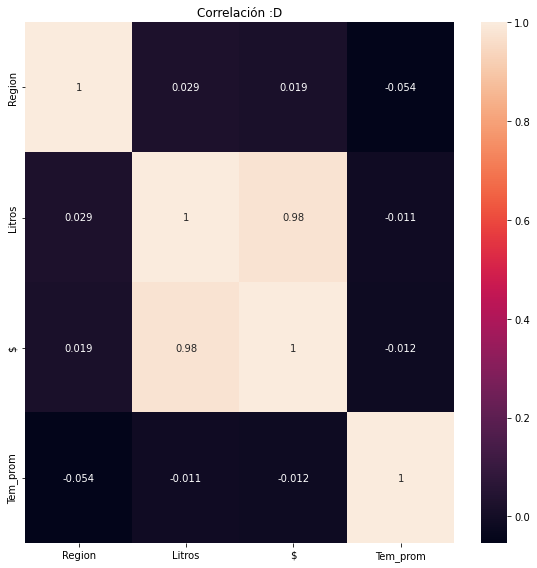

In [12]:
# Correlation matrix
import seaborn as sns
plt.figure(figsize=(8,8))
crrl=df.corr()
sns.heatmap(crrl,annot=True).set_title('Correlación :D')
plt.tight_layout()
plt.show()

In [13]:
# Variable $/liters
df['Precio por Litro']=df['$']/df['Litros']

In [14]:
# Observe records for one day
df.loc[df['%Key_FechaID']=='2019-09-01']

,Region,Filial,Tipo,Punto de venta,%Key_FechaID,Litros,$,Tem_prom,Precio por Litro
1,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 08,2019-09-01,15.0,120.0,24.9,8.000000
29,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 08,2019-09-01,40.0,299.0,24.9,7.475000
107,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 09,2019-09-01,12.0,80.0,24.9,6.666667
108,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 09,2019-09-01,27.0,186.0,24.9,6.888889
109,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 09,2019-09-01,19.0,132.0,24.9,6.947368
...,...,...,...,...,...,...,...,...,...
296576,4,"Saltillo, Coahuila, México",Autotanque,ATQ. SAL 20,2019-09-01,4.0,35.0,27.4,8.750000
296577,4,"Saltillo, Coahuila, México",Autotanque,ATQ. SAL 20,2019-09-01,2.0,21.0,27.4,10.500000
296578,4,"Saltillo, Coahuila, México",Autotanque,ATQ. SAL 20,2019-09-01,2.0,21.0,27.4,10.500000
296579,4,"Saltillo, Coahuila, México",Autotanque,ATQ. SAL 20,2019-09-01,3.0,23.0,27.4,7.666667


In [15]:
# Drop columns
df=df.drop(columns=['Litros'])
df.head()

,Region,Filial,Tipo,Punto de venta,%Key_FechaID,$,Tem_prom,Precio por Litro
0,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 09,2019-09-15,131.0,24.9,8.187500
1,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 08,2019-09-01,120.0,24.9,8.000000
2,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 08,2019-09-02,92.0,24.9,7.666667
3,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 08,2019-09-05,105.0,24.9,8.076923
4,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 08,2019-09-06,105.0,24.9,8.076923


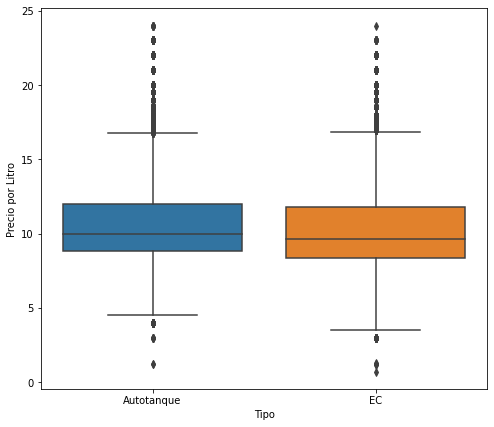

In [16]:
# Box plot type of gas vs liter price
plt.figure(figsize=(8, 7))
sns.boxplot(y='Precio por Litro', x='Tipo', data=df)
plt.show()

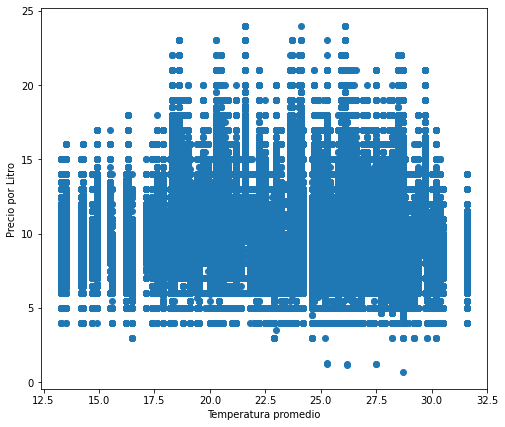

In [17]:
# Scatter plot temperature vs liter price
plt.figure(figsize=(8, 7))
plt.scatter(y='Precio por Litro', x='Tem_prom', data=df)
plt.xlabel('Temperatura promedio')
plt.ylabel('Precio por Litro')
plt.show()

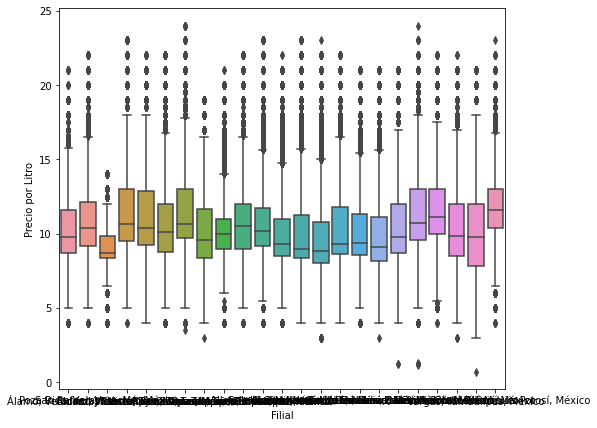

In [18]:
# Box plot location vs liter price
plt.figure(figsize=(8, 7))
sns.boxplot(y='Precio por Litro', x='Filial', data=df)
plt.show()

In [19]:
df.head()

,Region,Filial,Tipo,Punto de venta,%Key_FechaID,$,Tem_prom,Precio por Litro
0,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 09,2019-09-15,131.0,24.9,8.187500
1,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 08,2019-09-01,120.0,24.9,8.000000
2,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 08,2019-09-02,92.0,24.9,7.666667
3,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 08,2019-09-05,105.0,24.9,8.076923
4,5,"Álamo, Veracruz, México",Autotanque,ATQ. ALA 08,2019-09-06,105.0,24.9,8.076923


In [20]:
df1=df[['Filial','Tipo','%Key_FechaID','$','Tem_prom','Precio por Litro']]
df1=df1.dropna(axis=0)
df1.tail()

,Filial,Tipo,%Key_FechaID,$,Tem_prom,Precio por Litro
12866311,"Saltillo, Coahuila, México",Autotanque,2021-01-28,29.0,13.5,9.666667
12866312,"Saltillo, Coahuila, México",Autotanque,2021-01-28,66.0,13.5,9.428571
12866313,"Saltillo, Coahuila, México",Autotanque,2021-01-28,46.0,13.5,9.200000
12866314,"Saltillo, Coahuila, México",Autotanque,2021-01-28,21.0,13.5,10.500000
12866315,"Saltillo, Coahuila, México",Autotanque,2021-01-30,940.0,13.5,8.952381


In [21]:
df1['Precio por Litro'].describe()

count    1.260390e+07
mean     1.027130e+01
std      2.184697e+00
min      7.272727e-01
25%      8.666667e+00
50%      1.000000e+01
75%      1.200000e+01
max      2.400000e+01
Name: Precio por Litro, dtype: float64

## Prepare df export

In [22]:
df2=pd.pivot_table(df1,
   index=['Filial','%Key_FechaID','Tipo'],
   aggfunc={'Precio por Litro': np.mean,'$': np.sum,'Tem_prom':np.max})

In [23]:
df2.tail()

$  Precio por Litro  \
Filial                  %Key_FechaID Tipo                                    
Álamo, Veracruz, México 2021-12-27   Autotanque  57032.0         12.654483   
                        2021-12-28   Autotanque  53717.0         12.742470   
                        2021-12-29   Autotanque  46970.0         12.734889   
                        2021-12-30   Autotanque  53353.0         12.724375   
                        2021-12-31   Autotanque  64806.0         12.699153   

                                                 Tem_prom  
Filial                  %Key_FechaID Tipo                  
Álamo, Veracruz, México 2021-12-27   Autotanque      21.2  
                        2021-12-28   Autotanque      21.2  
                        2021-12-29   Autotanque      21.2  
                        2021-12-30   Autotanque      21.2  
                        2021-12-31   Autotanque      21.2

In [24]:
df2.shape

(43766, 3)

In [ ]:
# Export dataframe
df2.to_csv('Datos_Agrupados.csv')